In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as dt
import numpy as np

df = pd.read_csv("wiki_hindi_pageviews_2000_thru_Sep2019.csv")
df.head()

,Unnamed: 0,project,language,article,access,agent,granularity,date,views
0,1,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-01,15
1,2,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-02,10
2,3,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-03,19
3,4,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-04,10
4,5,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-05,11


In [2]:
df = df[df['article'] == "Article 370 of the Constitution of India"]

df['ts'] = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)

df.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
1554,1555,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,14,2016-10-17
1555,1556,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,97,2016-10-18
1556,1557,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,109,2016-10-19
1557,1558,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,108,2016-10-20
1558,1559,wikipedia,hi,Article 370 of the Constitution of India,all-access,all-agents,daily,157,2016-10-21


Text(0.5, 1.0, 'Hindi Article 370 Pageviews per day')

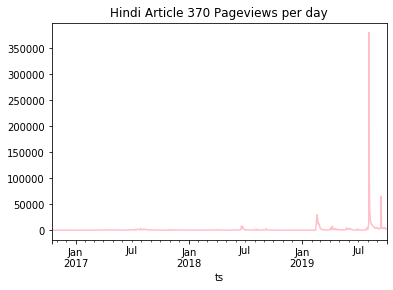

In [3]:
df = df.set_index('ts')

df['views'].plot(linestyle='-', linewidth=1.5, color = 'pink')

plt.title('Hindi Article 370 Pageviews per day')

Text(0.5, 1.0, 'Hindi Article 370 Pageviews per day log scale')

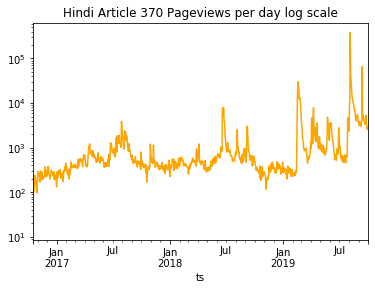

In [4]:
df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')
plt.title('Hindi Article 370 Pageviews per day log scale')

In [32]:
df2 = pd.read_csv("wiki_english_pageviews_2000_thru_Sep2019.csv")
df2 = df2[df2['article'] == 'Article_370_of_the_Constitution_of_India']

df2['ts'] = pd.to_datetime(df2['date'])
df2 = df2.drop('date', axis=1)

df2.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
1554,1555,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,4,2015-07-01
1555,1556,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,1,2015-07-02
1556,1557,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,2,2015-07-03
1557,1558,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,4,2015-07-04
1558,1559,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,1,2015-07-05


Text(0.5, 1.0, 'English Article 370 Pageviews per day')

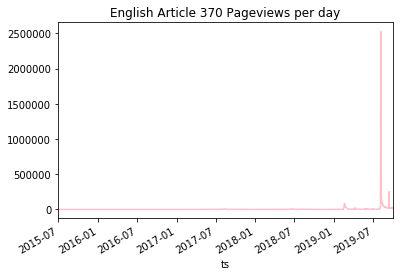

In [33]:
df2 = df2.set_index('ts')

df2['views'].plot(linestyle='-', linewidth=1.5, color = 'pink') 

plt.title('English Article 370 Pageviews per day')

Text(0.5, 1.0, 'English Article 370 Pageviews per day log scale')

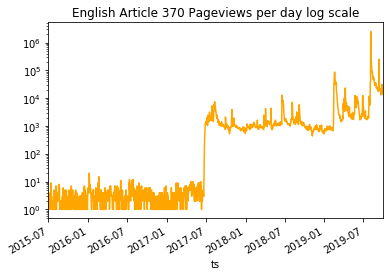

In [34]:
df2['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')

plt.title('English Article 370 Pageviews per day log scale')

In [8]:
df3 = pd.read_csv("wiki_urdu_pageviews_2000_thru_Sep2019.csv")
df3 = df3[df3['article'] == "Article 370 of the Constitution of India"]

df3['ts'] = pd.to_datetime(df3['date'])
df3 = df3.drop('date', axis=1)

df3.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
58,59,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,2,2015-07-01
59,60,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,11,2015-07-02
60,61,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,11,2015-07-03
61,62,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,6,2015-07-04
62,63,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,2,2015-07-05


Text(0.5, 1.0, 'Urdu Article 370 Pageviews per day')

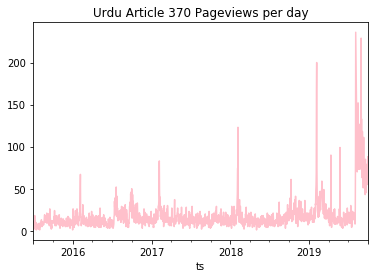

In [9]:
df3 = df3.set_index('ts')

df3['views'].plot(linestyle='-', linewidth=1.5, color = 'pink')

plt.title('Urdu Article 370 Pageviews per day')

Text(0.5, 1.0, 'Urdu Article 370 Pageviews per day log scale')

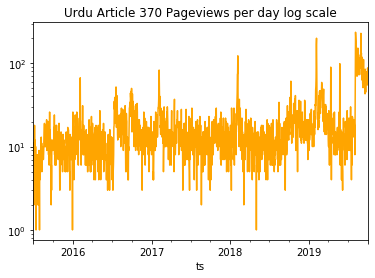

In [10]:
df3['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')
plt.title('Urdu Article 370 Pageviews per day log scale')

In [11]:
# all at once, save
# IDK why there are errors here - the files get made, it seems to work fine
'''
for file in [ "wiki_hindi_pageviews_2000_thru_Sep2019.csv", "wiki_urdu_pageviews_2000_thru_Sep2019.csv", "wiki_english_pageviews_2000_thru_Sep2019.csv"]:

    df0 = pd.read_csv(file)
    
    if "hindi" in file:
        lang = "hindi"
    elif "english" in file:
        lang = "english"
    else:
        lang = "urdu"

    for article in ["Article 370 of the Constitution of India", "Kashmir conflict", "Insurgency in Jammu and Kashmir"]:
        try:
            df = df0[(df0['article'] == article) | (df0['article'] == article.replace(' ', '_'))]

            df['ts'] = pd.to_datetime(df['date'])
            df = df.drop('date', axis=1)

            df = df.set_index('ts')

            df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
            plt.title(lang + ' ' + article + ' Pageviews per day')
                
            plt.savefig(lang + " " + article + "_pageviews_linear.png")

            plt.clf()

            df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
            plt.yscale('log')
            plt.title(lang + ' ' + article + ' Pageviews per day log scale')
            plt.savefig(lang + " " + article + "_pageviews_log.png")

            plt.clf()

        except:
            print('exception')
            # do nothing - this will happen with Urdu on Insurgency article because there is no such article
'''

/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

exception


/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

<Figure size 432x288 with 0 Axes>

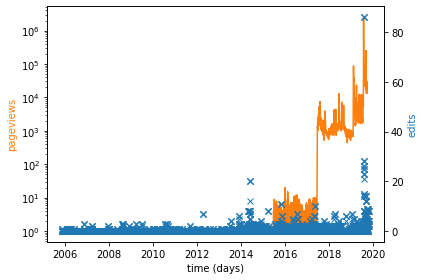

In [38]:
# English pageviews and edits plot

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('time (days)')
ax1.set_ylabel('pageviews', color=color)
ax1.plot(df2['views'], color=color)
plt.yscale('log')
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

mypath = "../data/revisions/"
file = "rev_article_en_29-10-2019 23-52-48.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        dfEdits = pd.DataFrame(data)
        
dfEdits['timestamp'] = pd.to_datetime(dfEdits['timestamp'])
dfEdits = dfEdits.set_index('timestamp')
dfEdits = dfEdits.groupby(pd.Grouper(freq='D', level=0)).count()

color = 'tab:blue'
ax2.set_ylabel('edits', color=color)  # we already handled the x-label with ax1
ax2.plot(dfEdits, marker='x', linestyle='', color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


In [41]:
# Correlation

def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """ 
    return datax.corr(datay.shift(lag))

# pandas timezone weirdness requires?
#df2.index.tz_convert(None)
dfEdits.index = dfEdits.index.date

print(dfEdits.index)



Index([2005-11-22, 2005-11-23, 2005-11-24, 2005-11-25, 2005-11-26, 2005-11-27,
       2005-11-28, 2005-11-29, 2005-11-30, 2005-12-01,
       ...
       2019-10-19, 2019-10-20, 2019-10-21, 2019-10-22, 2019-10-23, 2019-10-24,
       2019-10-25, 2019-10-26, 2019-10-27, 2019-10-28],
      dtype='object', length=5089)


In [44]:
dfEdits.head()

,user,size,comment,anon
2005-11-22,1,1,1,0
2005-11-23,0,0,0,0
2005-11-24,0,0,0,0
2005-11-25,0,0,0,0
2005-11-26,0,0,0,0


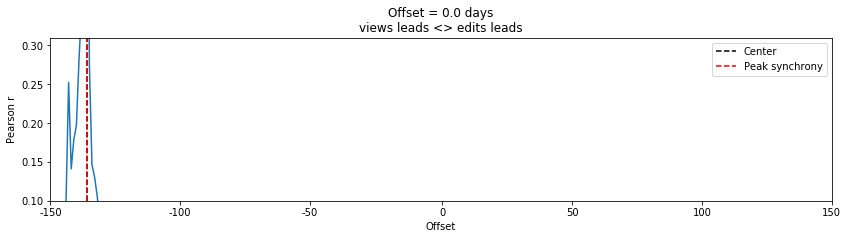

In [49]:
# -2 week to 2 week lag?
# We "know" that edits don't lead pageviews but...
# TODO right now this excluded "anon" users' edits

rs = [crosscorr(df2['views'], dfEdits['user'], lag) for lag in range(int(-14),int(14))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nviews leads <> edits leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()